Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Все исправления корректны!
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import Pool, CatBoostRegressor, cv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Приведем значения столбца datetime к типу данных datetime64:

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.duplicated().sum()

0

<b>Вывод<b>

Данные содержат 26496 строк и 2 столбца, пропущенные значения и дубликаты отсутствуют.  

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен.
</div>

## Анализ

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


Аномальные значения отсутсвуют.

Установим индекс таблицы равным столбцу datetime и проверим, в хронологическом ли порядке расположены даты и время:

In [8]:
df = df.set_index('datetime')

In [9]:
df.index.is_monotonic

True

Данные представлены в хронологипческом порядке.

Выполним ресемплирование с подсчетом суммы заказов по одному часу:

In [10]:
df = df.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Успех:</b> Ресемпилнг был сделан правильно.
</div>

Разложим временной ряд на тренд и сезонную компоненту:

In [11]:
decomposed = seasonal_decompose(df)

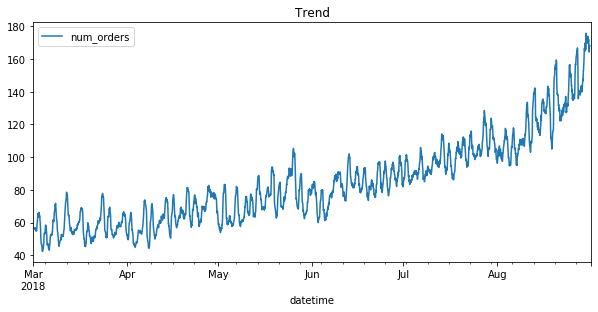

In [12]:
plt.figure(figsize=(10, 15))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.show()

На вышепредставленном графике прослеживается тренд увеличесния количества заказов такси с каждым месяцем и их резкий рост к концу лета.

Проанализируем сезонность:

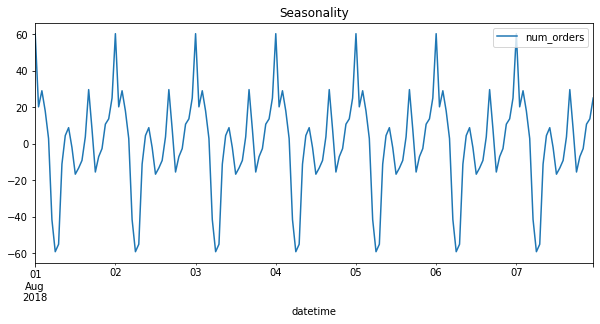

In [13]:
plt.figure(figsize=(10, 15))
plt.subplot(312)
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.show()

Резкое увеличение нагрузки прослеживается к концу каждых суток.

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция проведена. Отлично, что сезонность была визуализирована на более коротком интервале.
</div>

Напишем функцию создания дополнительных признаков для прогнозирования: "календарные признаки", "отстающие значения" и "скользящее среднее": 

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
</div>

<b>Вывод</b>

Аномальные значения в данных не обнаружены, данные представлены в хронологическом порядке. Наблюдается тренд увеличения количества заказов с марта по август с резким всплеском к концу августа. Что касается посуточного анализа количества заказов, то максимальная нагрузка прослеживается к концу каждых суток.  
Для возможности дальнейшего прогнозирования была создана функция, создающая дополнительные признаки: "календарные признаки", "отстающие значения" и "скользящее среднее".

## Обучение

Создадим дополнительные признаки:

In [15]:
make_features(df, 24, 70)

Разобъем датасет на обучающую и тестовую выборки в соотношении 5:1 без перемешивания данных.

In [16]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные разбиты правильно.
</div>

Удалим из обучающей выборки пустые значения:

In [17]:
train = train.dropna()

Выделим целевой признак и признаки:

In [18]:
target_train = train['num_orders']
features_train = train.drop(['num_orders'] , axis=1)

target_test = test['num_orders']
features_test = test.drop(['num_orders'] , axis=1)

In [19]:
state=np.random.RandomState(12345)

<div class="alert alert-block alert-info">Применение TimeSeriesSplit</div>

In [20]:
cv = TimeSeriesSplit(n_splits=8)

In [21]:
models = [DecisionTreeRegressor(random_state = state), 
          RandomForestRegressor(random_state = state),
          LGBMRegressor(random_state = 12345),
          LinearRegression()]

In [22]:
param_grid = [{'max_depth': [5, 10, 15]},
              
              {'max_depth': [5, 10, 15],
               'n_estimators': [50, 100, 200]},
             
              {'max_depth': [5, 10, 15],
               'n_estimators': [50, 100, 200],
               'learning_rate': [0.05, 0.1, 0.5]},
             
              {}]

In [23]:
results = []
best_score = 100000
best_model = None
for i, model in enumerate(models):
    grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid[i],
                          cv = cv,
                          scoring = 'neg_mean_squared_error')
    result = grid_search.fit(features_train, target_train)
    cv_results = pd.DataFrame(result.cv_results_)[['mean_test_score']]
    cv_results['Model'] = str(model).split('(')[0]
    cv_results['RMSE'] = np.sqrt(abs(cv_results['mean_test_score']))
    if cv_results['RMSE'].min() < best_score:
        best_score = cv_results['RMSE'].min()
        best_model = result.best_estimator_
    results.append(cv_results)

In [24]:
pd.concat([result for result in results], axis=0).sort_values(by='RMSE', ascending = True).reset_index(drop=True)

,mean_test_score,Model,RMSE
0,-644.179934,RandomForestRegressor,25.380700
1,-645.624917,RandomForestRegressor,25.409150
2,-652.574458,RandomForestRegressor,25.545537
3,-655.013111,LGBMRegressor,25.593224
4,-655.723351,RandomForestRegressor,25.607096
5,-655.763360,LGBMRegressor,25.607877
6,-657.128039,LGBMRegressor,25.634509
7,-658.244881,LGBMRegressor,25.656283
8,-659.167840,LGBMRegressor,25.674264
9,-659.544960,RandomForestRegressor,25.681607


In [25]:
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False,
                      random_state=RandomState(MT19937) at 0x7F237B25A160,
                      verbose=0, warm_start=False)

In [26]:
predictions_train = best_model.predict(features_train)

<b>Модель линейной регрессии</b>

In [27]:
#model_lr = LinearRegression()
#model_lr.fit(features_train, target_train)
#predicted_train = model_lr.predict(features_train)
#rmse = mean_squared_error(target_train, predicted_train) ** 0.5

#result.append({'Модель': 'LinearRegression',
 #              'RMSE': rmse})

<b>Модель дерева решений</b>

In [28]:
#best_model_dr = None
#best_rmse = 10000
#best_depth = 0
#for depth in range(1, 11):
    #model_dr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    #model_dr.fit(features_train, target_train)
 #   grid_search = GridSearchCV(estimator=DecisionTreeRegressor,
  #                        param_grid={'max_depth': [5, 10, 15]},
   #                       cv = cv,
    #                      scoring = 'neg_mean_squared_error')
    #predictions_train_dr = grid_search.predict(features_train)
    #rmse = mean_squared_error(target_train, predictions_train_dr) ** 0.5
    #if rmse < best_rmse:
     #   best_model_dr = model_dr
      #  best_rmse = rmse
       # best_depth = depth
        
#result.append({'Модель': 'DecisionTreeRegressor',
 #                        'Параметры': {'best_depth': depth},
  #             'RMSE': rmse})

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Подбирать параметры на треине нельзя, так как это ведет к переобучению. Лучшее решение – исопльзовать кросс-валидацию. При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<b>Вывод</b>

Лучший результат показала модель RandomForestRegressor, проверим ее на тестовой выборке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что ты попробовала разные модели!
</div>

## Тестирование

In [29]:
predictions = best_model.predict(features_test)
print('RMSE на тестовой выборке: ', np.sqrt(mean_squared_error(target_test, predictions)))

RMSE на тестовой выборке:  42.44232311396745


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> При тестирвовании катбуста допущена опечатка.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было визуализировать предсказания и настоящие значения на одном графике.
</div>

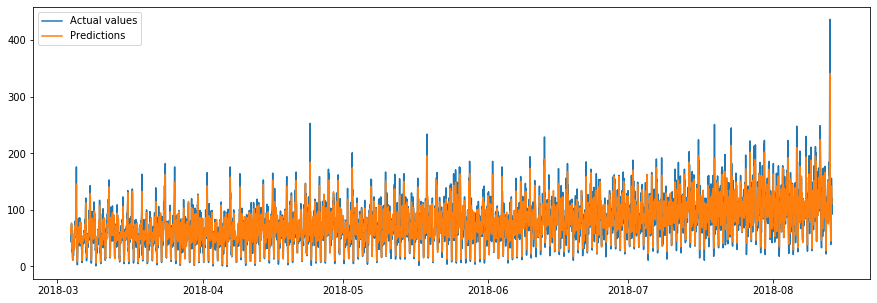

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(features_train.index, target_train, label='Actual values')
plt.plot(features_train.index, predictions_train, label='Predictions')
plt.legend()
plt.show()

## Вывод

С помощью анализа данных удалось установить тренд ежемесячного увелимчения колиства заказов с максимальным всплеском во второй половине августа. Также была выделена сезонность: наибольшое количество заказов приходится на конец суток.  
Для более качественного прогноза была написана функция создания дополнительных признаков, подобран шаг максимального размера отстования и размер скользящего среднего.  
Во время обучения использвалось 4 модели, наилучшее качество показала модель случайного леса, RMSE которой на тестовых данных составило 42,44.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48